# **MCS_IDM_Project.ipynb**


## **Step 1**: Import All Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

## **Step 2**: Loading The Data


*   Loading The Dataset IRIS.
*   Loading The Dataset Breast_Cancer.

In [ ]:

iris = datasets.load_iris()
breast_cancer = datasets.load_breast_cancer()

### Convert Data to DataFrames

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
cancer_df['target'] = breast_cancer.target

# **EDA**: Exploratory Data Analysis

### Display The Data

In [ ]:
print(f"Iris: {iris_df.shape}\nCancer: {cancer_df.shape}")

Iris: (150, 5)
Cancer: (569, 31)


In [ ]:
iris_df.head(), cancer_df.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 1                4.9               3.0                1.4               0.2   
 2                4.7               3.2                1.3               0.2   
 3                4.6               3.1                1.5               0.2   
 4                5.0               3.6                1.4               0.2   
 
    target  
 0       0  
 1       0  
 2       0  
 3       0  
 4       0  ,
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0        17.99         10.38          122.80     1001.0          0.11840   
 1        20.57         17.77          132.90     1326.0          0.08474   
 2        19.69         21.25          130.00     1203.0          0.10960   
 3        11.42         20.38           77.58      386.1          0.14250   
 4        20.29         14.34          135.10     1297

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
iris_df.isnull().sum().sum(), cancer_df.isnull().sum().sum() # Showing Number Of Nulls in Datasets

(np.int64(0), np.int64(0))

## Data Visualization

### First: Iris Dataset

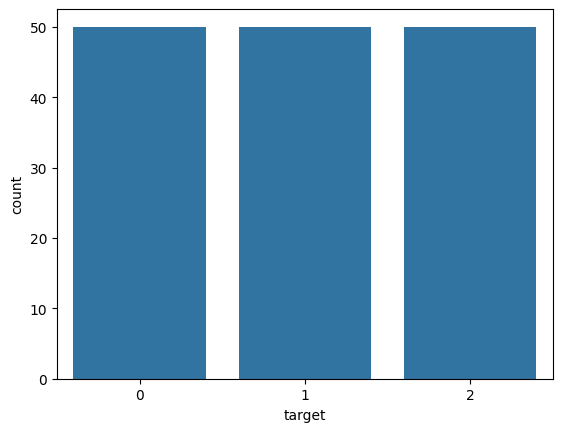

In [ ]:
sns.countplot(x='target', data=iris_df, )
plt.show()

### Comparing Sepal Length and Sepal Width

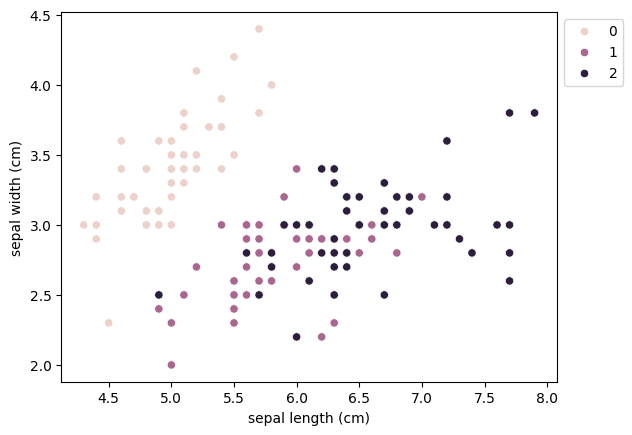

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='target', data=iris_df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

### Comparing Petal Length and Petal Width

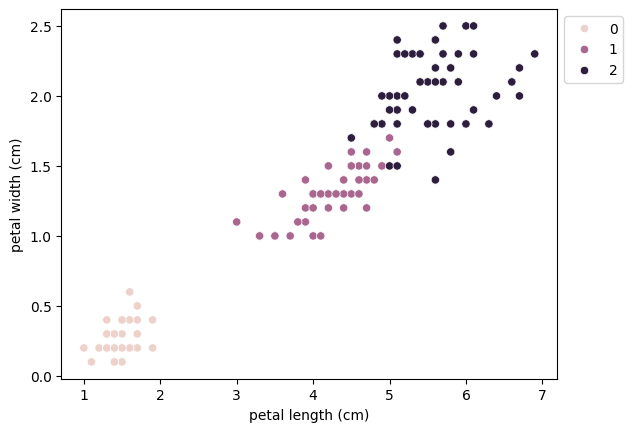

In [ ]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue='target', data=iris_df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

### Correlation Heatmap Of Iris Features

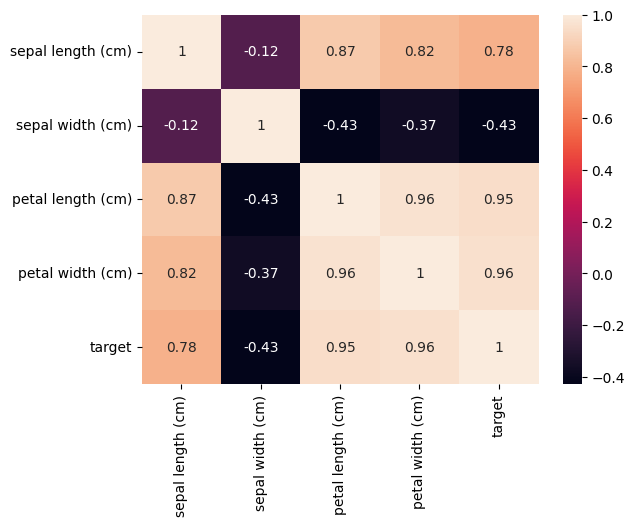

In [ ]:
sns.heatmap(iris_df.corr(method='pearson'),
			annot = True);

plt.show()

## Second: Breast_Cancer Dataset

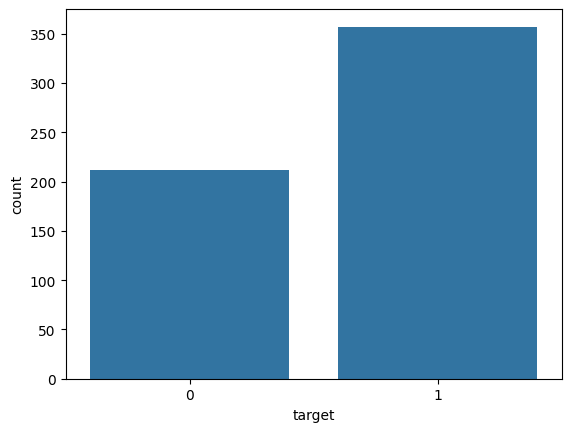

In [ ]:
sns.countplot(x='target', data=cancer_df, )
plt.show()

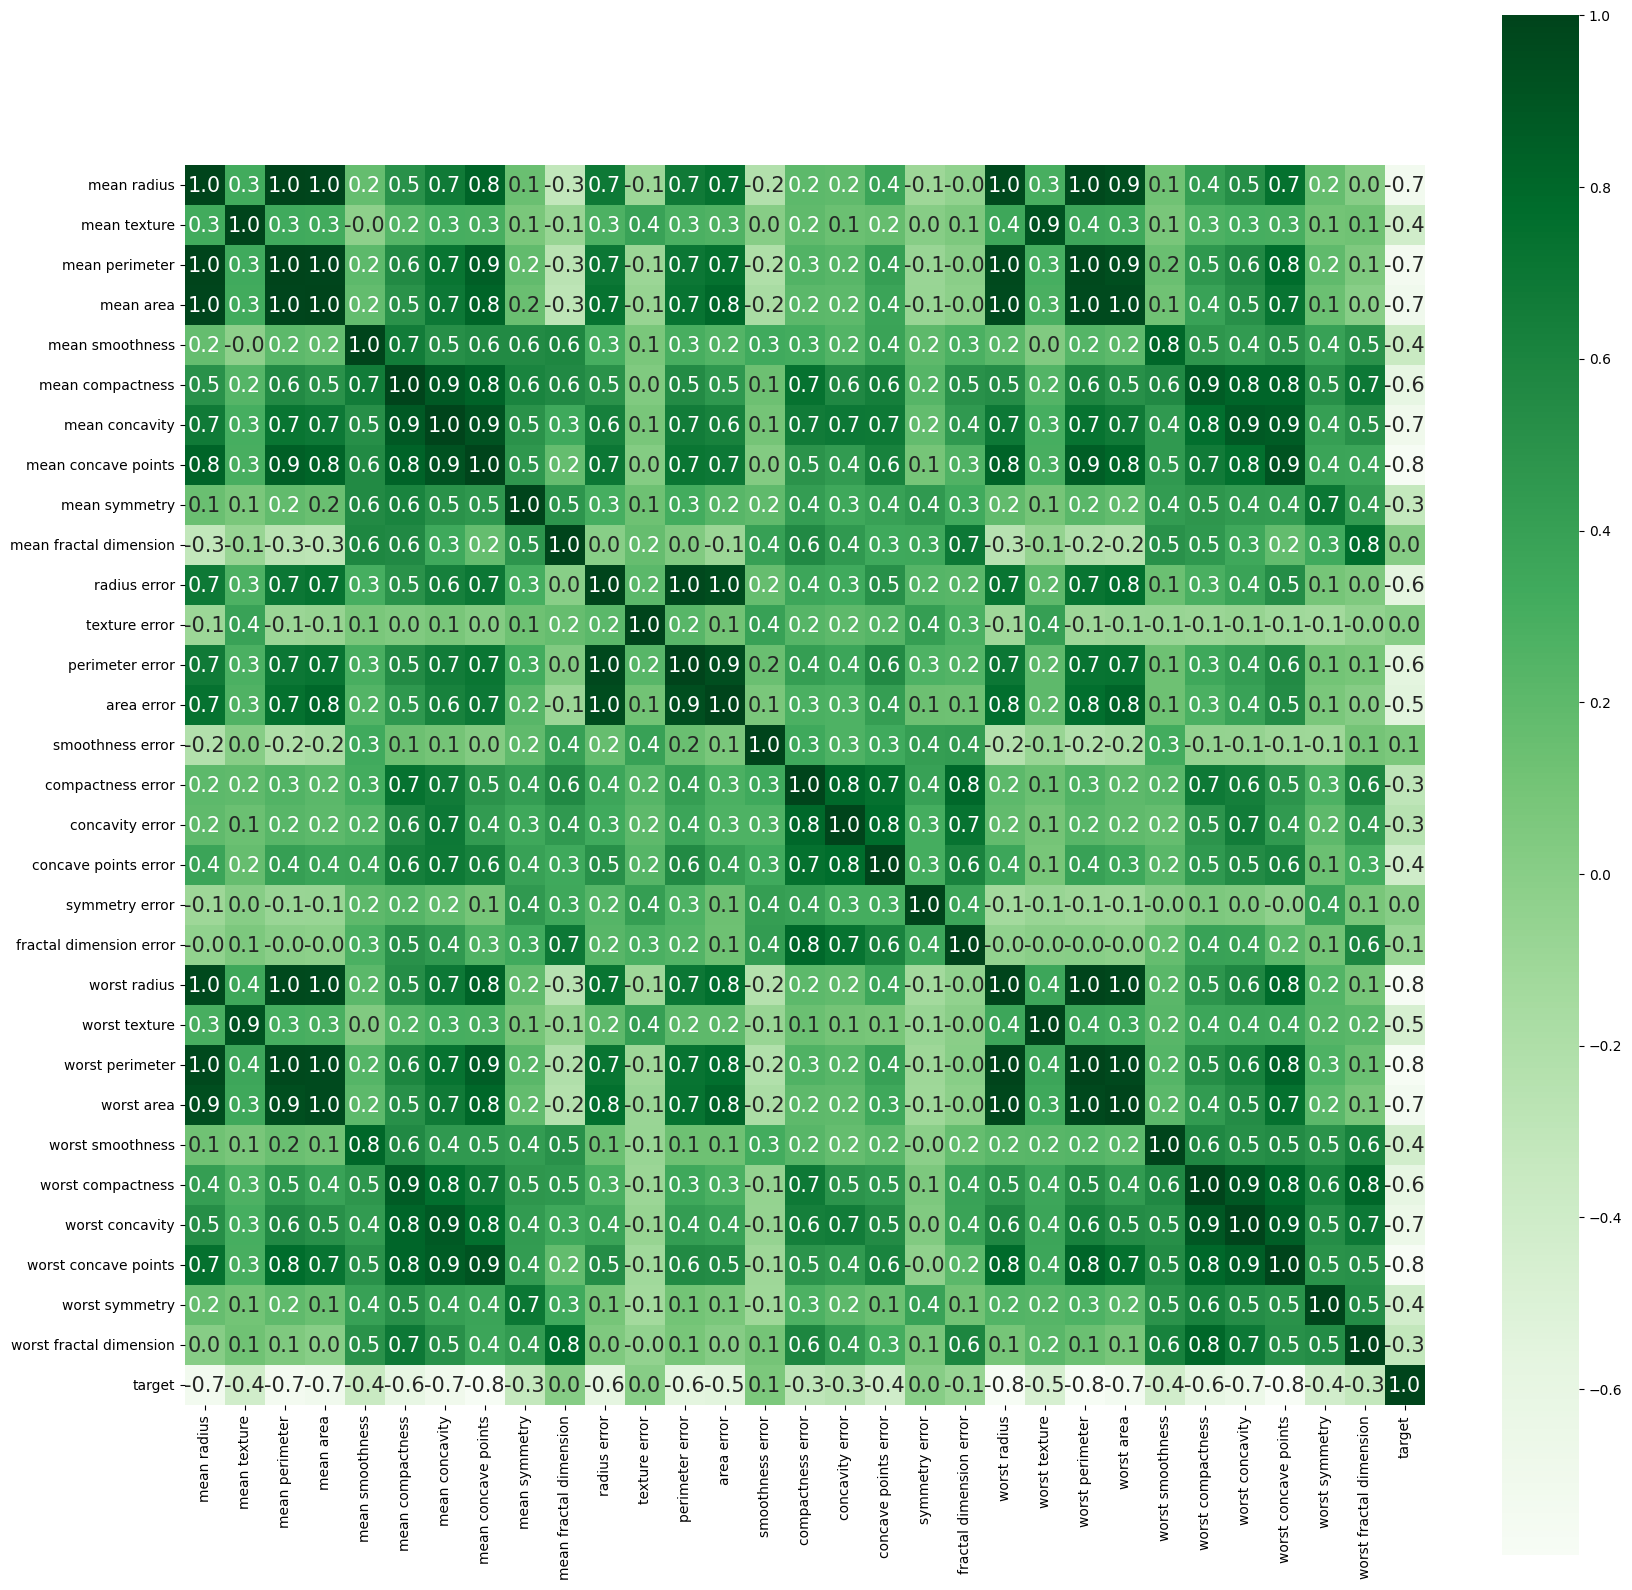

In [ ]:
corr = cancer_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

### Plotting the distibution of mean-radius

<ipython-input-15-f04ae4d82658>:1: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x="target", y="mean radius", data=cancer_df, jitter=True, edgecolor="gray")


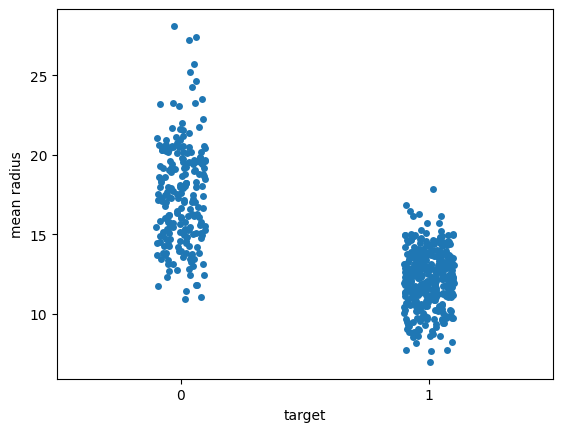

In [ ]:
sns.stripplot(x="target", y="mean radius", data=cancer_df, jitter=True, edgecolor="gray")
plt.show()

### Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs) with hue = "target"

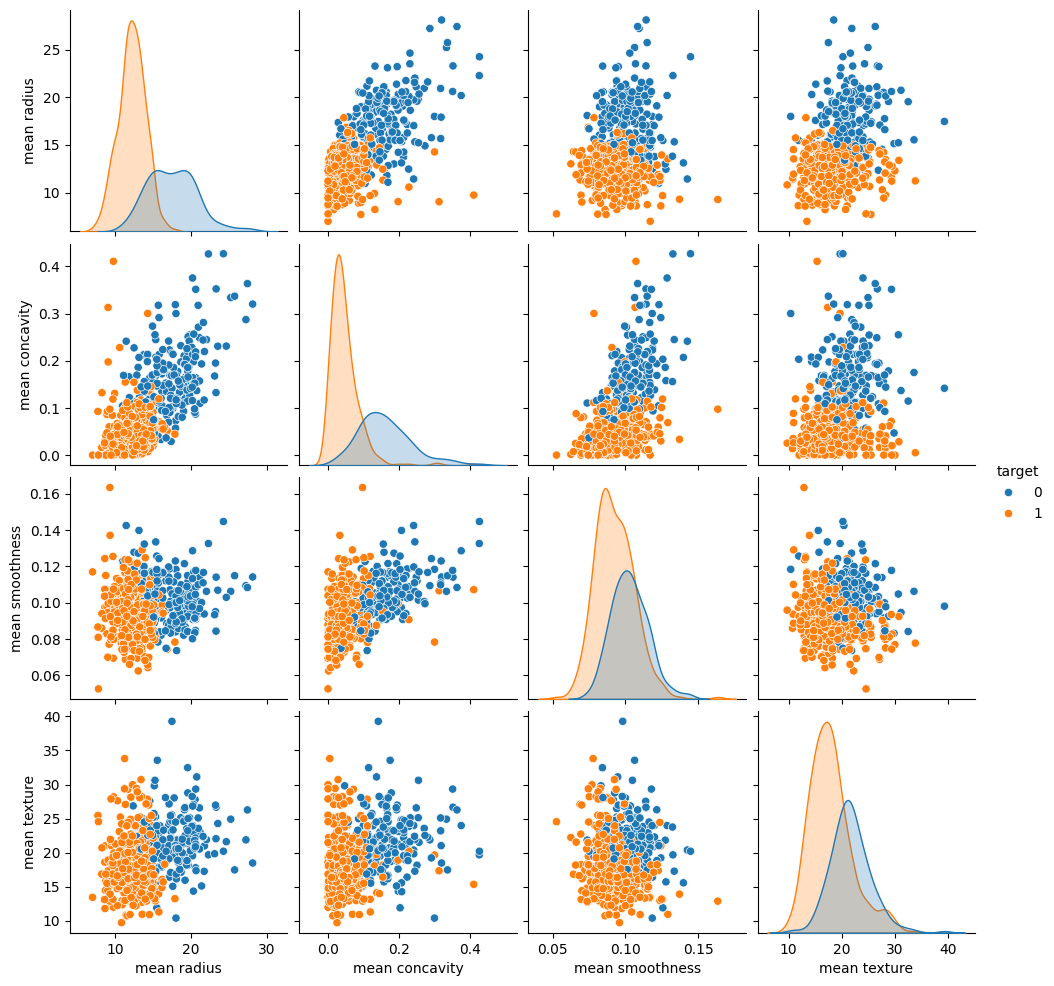

In [ ]:
sns.pairplot(cancer_df, hue="target", vars = ["mean radius", "mean concavity", "mean smoothness", "mean texture"])
plt.show()

## **Step 3**: Data Preprocessing

### Remove Duplicates


In [ ]:
iris_df = iris_df.drop_duplicates()
iris_df.duplicated().sum()

np.int64(0)

In [ ]:
def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # توحيد البيانات
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # تقسيم البيانات إلى تدريب واختبار
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )
    return X_train, X_test, y_train, y_test

# تطبيق على مجموعتي البيانات
iris_X_train, iris_X_test, iris_y_train, iris_y_test = preprocess_data(iris_df, 'target')
cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = preprocess_data(cancer_df, 'target')

## **Step 4**: Model Building

### Initialize Models

In [ ]:
i_models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='linear', random_state=42)
}

c_models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='linear', random_state=42)
}

### Define Training Function

In [ ]:
param_grid = {
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "Decision Tree": {"max_depth": [None, 5, 10, 20], "criterion": ["gini", "entropy"]},
    "Naive Bayes": {},
    "SVM": {"C": [0.1, 1, 10]}
}

In [ ]:
def train_evaluate_models(models, X_train, X_test, y_train, y_test):
    results={}
    tuned_models = {}  # حفظ النماذج بعد ضبط المعلمات

    for name, model in models.items():
        best_params = "No tuning"

        # تطبيق GridSearchCV فقط إذا كان النموذج لديه معلمات قابلة للضبط
        if name in param_grid and param_grid[name]:
            grid_search = GridSearchCV(model, param_grid[name], cv=5, n_jobs=-1)
            grid_search.fit(X_train, y_train)
            model = grid_search.best_estimator_
            best_params = grid_search.best_params_

        # حفظ النموذج بعد ضبط المعلمات لضمان التدريب الصحيح
        tuned_models[name] = model

        # تدريب النموذج النهائي
        start_time = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start_time

        # التنبؤات
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # حساب الدقة
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        results[name] = {
            'Best Hyperparameters': best_params,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Training Time (s)': round(train_time, 4)
        }

    return results, tuned_models


### Training The models On IRIS Dataset

In [ ]:
iris_results_tuned, i_models_tuned = train_evaluate_models(i_models, iris_X_train, iris_X_test, iris_y_train, iris_y_test)
pd.DataFrame(iris_results_tuned).T

,Best Hyperparameters,Train Accuracy,Test Accuracy,Training Time (s)
Logistic Regression,{'C': 1},0.97479,1.0,0.0049
Decision Tree,"{'criterion': 'gini', 'max_depth': 5}",0.991597,1.0,0.0014
Naive Bayes,No tuning,0.94958,1.0,0.001
SVM,{'C': 10},0.966387,0.966667,0.0015


### Training The models On Breast_Cancer Dataset

In [ ]:
cancer_results_tuned, c_models_tuned = train_evaluate_models(c_models, cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test)
pd.DataFrame(cancer_results_tuned).T

,Best Hyperparameters,Train Accuracy,Test Accuracy,Training Time (s)
Logistic Regression,{'C': 1},0.986813,0.973684,0.0052
Decision Tree,"{'criterion': 'entropy', 'max_depth': 5}",0.993407,0.947368,0.0095
Naive Bayes,No tuning,0.936264,0.964912,0.0013
SVM,{'C': 0.1},0.982418,0.982456,0.0035


## **Step 5**: Evaluation

In [ ]:
def plot_evaluation(model, X_test, y_test, model_name, dataset_name):
 try:
    y_pred = model.predict(X_test)

    # مصفوفة الارتباك
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix - {model_name} ({dataset_name})')
    plt.show()

    # تقرير التصنيف
    print(f"Classification Report - {model_name} ({dataset_name}):\n")
    print(classification_report(y_test, y_pred))
 except Exception as e:
    print(f"error in {model_name} is {e}")

### Evaluate All Models on IRIS Dataset

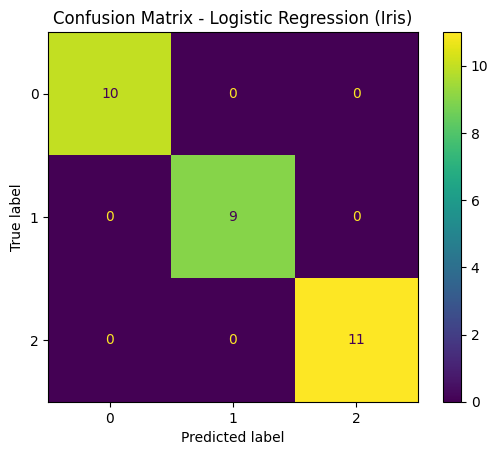

Classification Report - Logistic Regression (Iris):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



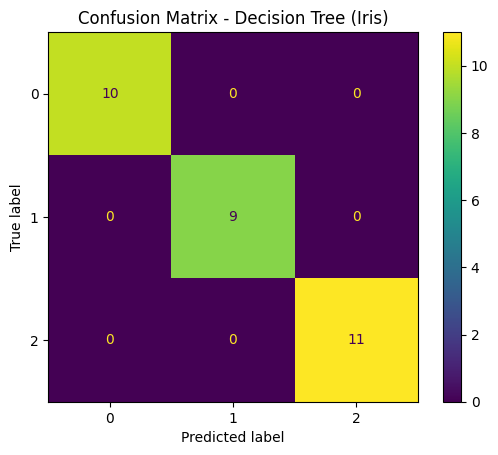

Classification Report - Decision Tree (Iris):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



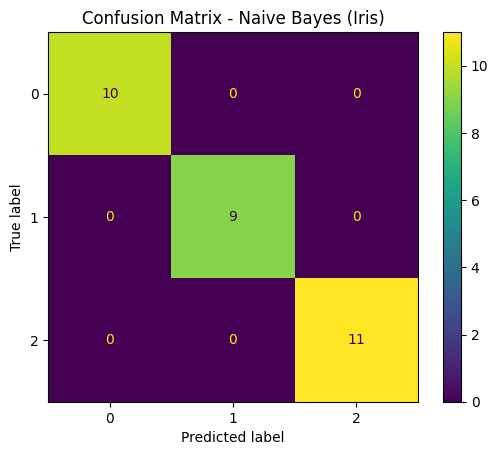

Classification Report - Naive Bayes (Iris):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



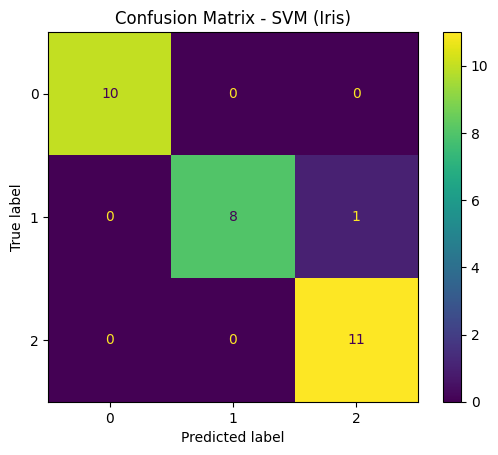

Classification Report - SVM (Iris):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
for name, model in i_models_tuned.items():
    plot_evaluation(model, iris_X_test, iris_y_test, name, "Iris")


### Evaluate All Models on Breast_Cancer Dataset

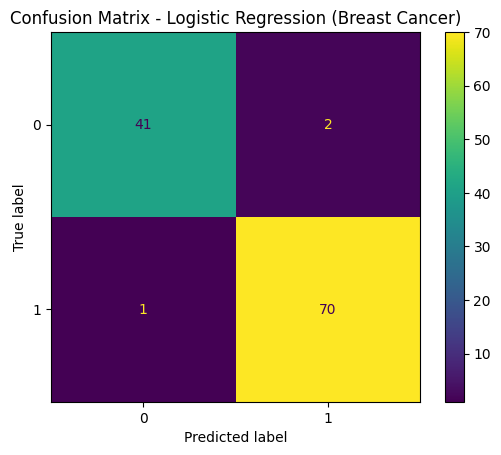

Classification Report - Logistic Regression (Breast Cancer):

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



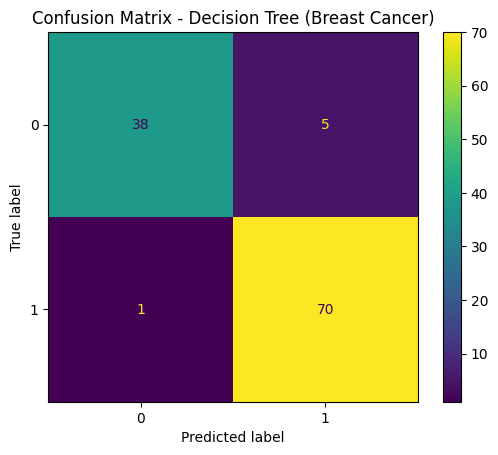

Classification Report - Decision Tree (Breast Cancer):

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



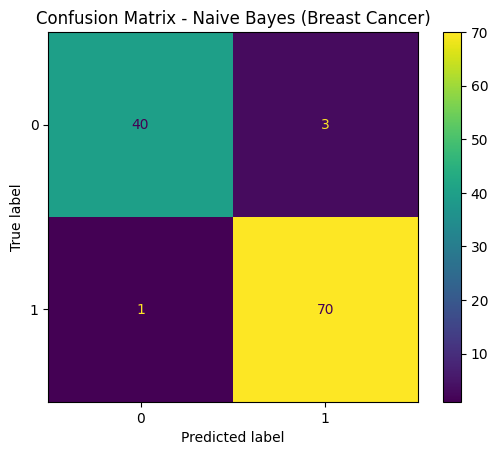

Classification Report - Naive Bayes (Breast Cancer):

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



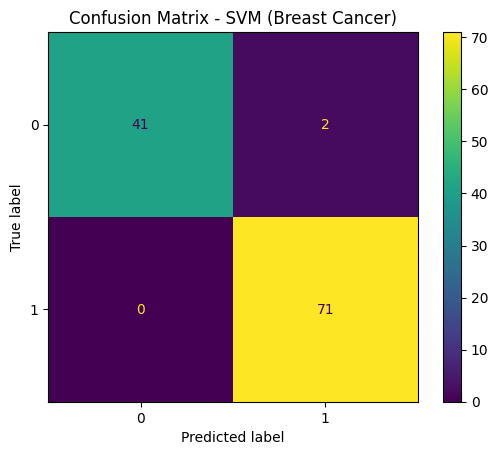

Classification Report - SVM (Breast Cancer):

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
for name, model in c_models_tuned.items():
    plot_evaluation(model, cancer_X_test, cancer_y_test, name, "Breast Cancer")

## **Step 6**: Cross Validation


### Defining The Cross Validation Function

In [ ]:
def perform_cross_validation(models, X, y, cv=5):
    cv_results = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv)
        cv_results[name] = {
            'Mean CV Accuracy': round(scores.mean(), 4),
            'Std CV Accuracy': round(scores.std(), 4)
        }
    return pd.DataFrame(cv_results).T

### Apply On IRIS Dataset

In [ ]:
print("Cross Validation On IRIS Dataset:")
iris_cv = perform_cross_validation(i_models_tuned, iris.data, iris.target)
iris_cv

Cross Validation On IRIS Dataset:


,Mean CV Accuracy,Std CV Accuracy
Logistic Regression,0.9733,0.0249
Decision Tree,0.9533,0.0340
Naive Bayes,0.9533,0.0267
SVM,0.9733,0.0389


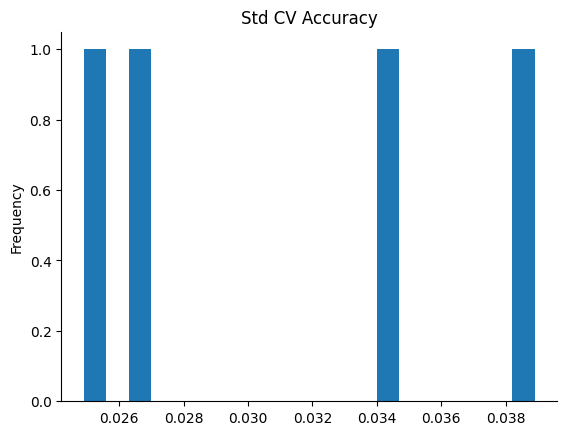

In [ ]:
# @title Std CV Accuracy

from matplotlib import pyplot as plt
iris_cv['Std CV Accuracy'].plot(kind='hist', bins=20, title='Std CV Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Apply Cross Validation On Breast_Cancer Dataset

In [ ]:
print("Cross Validation On Breast_Cancer Dataset:")
cancer_cv = perform_cross_validation(c_models_tuned, breast_cancer.data, breast_cancer.target)
cancer_cv

Cross Validation On Breast_Cancer Dataset:


,Mean CV Accuracy,Std CV Accuracy
Logistic Regression,0.9508,0.0180
Decision Tree,0.9350,0.0118
Naive Bayes,0.9385,0.0146
SVM,0.9490,0.0203


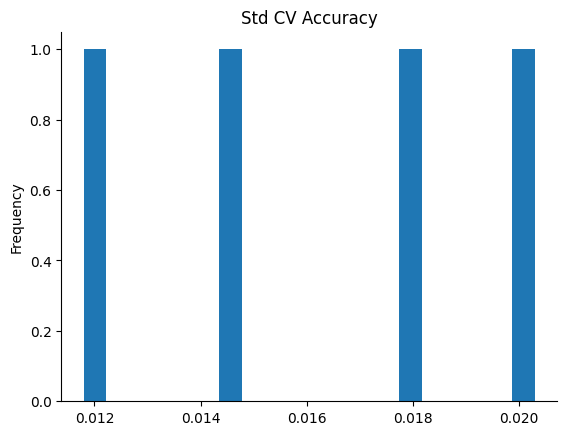

In [ ]:
# @title Std CV Accuracy

from matplotlib import pyplot as plt
cancer_cv['Std CV Accuracy'].plot(kind='hist', bins=20, title='Std CV Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Step 7**: Final Report

### Joining Results

In [ ]:
final_iris_report = pd.DataFrame(iris_results_tuned).T.join(iris_cv, how='inner') # Transpose iris_results before joining
final_cancer_report = pd.DataFrame(cancer_results_tuned).T.join(cancer_cv, how='inner') # Transpose cancer_results before joining

### Print Final Report For Both Datasets

In [ ]:
print("Final Report - Iris Dataset:")
final_iris_report

Final Report - Iris Dataset:


,Best Hyperparameters,Train Accuracy,Test Accuracy,Training Time (s),Mean CV Accuracy,Std CV Accuracy
Logistic Regression,{'C': 1},0.97479,1.0,0.0049,0.9733,0.0249
Decision Tree,"{'criterion': 'gini', 'max_depth': 5}",0.991597,1.0,0.0014,0.9533,0.0340
Naive Bayes,No tuning,0.94958,1.0,0.001,0.9533,0.0267
SVM,{'C': 10},0.966387,0.966667,0.0015,0.9733,0.0389


In [ ]:
print("Final Report - Breast_Cancer Dataset:")
final_cancer_report

Final Report - Breast_Cancer Dataset:


,Best Hyperparameters,Train Accuracy,Test Accuracy,Training Time (s),Mean CV Accuracy,Std CV Accuracy
Logistic Regression,{'C': 1},0.986813,0.973684,0.0052,0.9508,0.0180
Decision Tree,"{'criterion': 'entropy', 'max_depth': 5}",0.993407,0.947368,0.0095,0.9350,0.0118
Naive Bayes,No tuning,0.936264,0.964912,0.0013,0.9385,0.0146
SVM,{'C': 0.1},0.982418,0.982456,0.0035,0.9490,0.0203


### Determine The Best Model For Each Dataset

In [ ]:
best_iris_model = final_iris_report['Test Accuracy'].idxmax()
best_cancer_model = final_cancer_report['Test Accuracy'].idxmax()

In [ ]:
print(f"Best Model for IRIS is: {best_iris_model}")
print(f"Best Model for Breast_Cancer is: {best_cancer_model}")

Best Model for IRIS is: Logistic Regression
Best Model for Breast_Cancer is: SVM


### Comparing Training Time

In [ ]:
print("Compare Training Time (per Seconds)")
print(pd.DataFrame({
    'Iris Training Time': final_iris_report['Training Time (s)'],
    'Cancer Training Time': final_cancer_report['Training Time (s)']
}))

Compare Training Time (per Seconds)
                    Iris Training Time Cancer Training Time
Logistic Regression             0.0049               0.0052
Decision Tree                   0.0014               0.0095
Naive Bayes                      0.001               0.0013
SVM                             0.0015               0.0035
